# Computer Vision - Detection

#### Version: V1

This course assessment represents 60% of the overall module assessment.

This is an individual exercise and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the College website.


**Note:**
1. Do not change the name of this notebook and accompanying files, i.e. the files have to be named: cvca.ipynb, main.py.
2. Do not remove/delete any cell.
3. Do not add any cell (you can work on a draft notebook and copy the implementations here).
4. Do not add your name or student code in the notebook or in the file name.
5. Do not use any external packages without written approval except those listed here:
   -    from matplotlib import pyplot as plt
   -    from skimage.draw import line_aa, line
   -    from skimage.draw import circle_perimeter_aa, circle_perimeter
   -    import numpy as np
6. Do not use helper functions.
7. A different set of test images will be used during marking.  
8. Your program/function will be forced to terminate if it does not stop while grading.
9. The CA requires electronic submission to the BART online submission platform. You should submit your file (cvca.ipynb) via the electronic submission system at https://bart.exeter.ac.uk/ under the category, ECMM426 Computer Vision, Coursework: workshop code.  
10. The submission due is 8 March 2023 at 12:00. 
11. Upload a compressed version of your files as a single file using the zip compression format.
12. You should upload your file ahead in advance of the deadline to avoid a late cap due to Internet problems or other technical difficulties.
13. Sending the file via e-mail is NOT considered a submission.
14. It is your responsibility to make sure you submitted the correct file. No extension will be granted on the grounds of mistakes in the upload process (e.g., the wrong version, a PDF, a link to the file etc.).
15. The understanding of the problem specifications and requirements described in this CA is part of the assessment process.

> Your codes and comments should be entered in the regions specified between
> *[Your code goes here]* and *[Your code ends here]*.
> Outside the regions, you cannot enter code or modify code: otherwise, no mark will be given.

**Evaluation criteria:**

Each question asks for one or more techniques to be implemented. 

Each question is awarded a number of marks. 

Each question defines the marking criteria in the docstring of the given function.

It is recommended to refer to Lectures, Workshops and content from the Reading List first before using other resources.

### Import packages

In [1]:
# Other modules are not supported during coursework marking.
# Other modules cannot be used unless a written approval is given.
from matplotlib import pyplot as plt
import numpy as np
# More information about skimage draw module can be found at 
# https://scikit-image.org/docs/stable/api/skimage.draw.html#skimage.draw.line
from skimage.draw import line, line_aa
from skimage.draw import circle_perimeter, circle_perimeter_aa

---
### Q1: Image negative (2 marks)
---

In [2]:
def my_image_negative(input_image):
    """Description:
    This function converts the input image into image negative.
    The implementation is that output intensity = 255 - input intensity, where 255 is the maximum intensity of an 8-bit single channel image.
    Then, output intensity is stored at the same pixel position.

    Parameter: input_image = input image array.

    Return: new_image = image negative.

    Requirements:
    Pre-defined/built-in functions for image negative cannot be used.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the implementation does not follow the description above.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    for x in range(H):
            for y in range(W):
                neg_pixel = 255 - input_image[x,y]
                new_image[x,y] = neg_pixel

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q2: Image smoothing (4 marks)
---

In [3]:
def my_image_smoothing(input_image):
    """Description:
    This function smooths the input image by using a 3x3 mean filter.
    The implementation of the 3x3 mean filter follows the details given in the Image Filtering lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the filter is not an average filter.
    No mark if the implementation does not follow details given the lecture notes.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    filter_size = 3
    kernel_array = np.ones((filter_size, filter_size), np.float32) / (filter_size**2)
    for i in range(filter_size//2, input_image.shape[0] - filter_size//2):
        for j in range(filter_size//2, input_image.shape[1] - filter_size//2):
            # Applying the filter to input_image and boundary
            boundary = input_image[i-filter_size//2:i+filter_size//2+1, j-filter_size//2:j+filter_size//2+1]
            smoothed_pixel = np.sum(boundary * kernel_array)
            new_image[i, j] = smoothed_pixel
                
    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q3: Edge gradient magnitude estimation (4 marks)
---

In [4]:
def my_grad_mag(input_image):
    """Description:
    This function estimates the edge gradient magnitude from the input image by using
    the 3x3 Sobel operators along x and y directions.
    The implementation of the 3x3 Sobel operators follows the details given in the Image Derivatives and Edge Detection lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation, edge detection cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the filters are not Sobel filters.
    No mark if the implementation does not follow details given the lecture notes.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    Ix = np.zeros_like(new_image)
    Iy = np.zeros_like(new_image)
    for i in range(1, input_image.shape[0]-1):
        for j in range(1, input_image.shape[1]-1):
            Ix[i,j] = np.sum(np.multiply(input_image[i-1:i+2, j-1:j+2], Gx))
            Iy[i,j] = np.sum(np.multiply(input_image[i-1:i+2, j-1:j+2], Gy))

    # Calculate the edge gradient magnitude
    new_image = np.sqrt(Ix**2 + Iy**2)

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q4: Image sharpening (4 marks)
---

In [5]:
def my_image_sharpening(input_image):
    """Description:
    This function enhances the input image by using a 3x3 image sharpening filter.
    The implementation of the 3x3 image sharpening filter follows the details given in the Image Filtering lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the filter is not an image sharpening filter.
    No mark if the implementation does not follow details given the lecture notes.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    kernel_array = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    
    for i in range(H - 2):
        for j in range(W - 2):
            X1 = np.sum(np.multiply(kernel_array, input_image[i:i + 3, j:j + 3]))
            if X1 > 255:
                X1 = 255
            elif X1 < 0:
                X1 = 0
            new_image[i + 1, j + 1] = X1
            
    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q5: Median filtering (4 marks)
---

In [6]:
def my_median_filtering(input_image):
    """Description:
    This function enhances the input image by using a 3x3 median filter.
    The implementation of the 3x3 median filter follows the details given in the Image Filtering lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the filter is not a median filter.
    No mark if the implementation does not follow details given the lecture notes.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    kernel_size = 3
    pad_size = kernel_size // 2

    # Array of zeros for padding
    padded_array = np.zeros((input_image.shape[0] + 2 * pad_size, input_image.shape[1] + 2 * pad_size))
    padded_array[pad_size:-pad_size, pad_size:-pad_size] = input_image

    # Applying median filter for pixels
    for i in range(pad_size, padded_array.shape[0] - pad_size):
        for j in range(pad_size, padded_array.shape[1] - pad_size):
            window = padded_array[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            median_value = np.median(window)
            new_image[i - pad_size, j - pad_size] = median_value


    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q6: Histogram equalization (8 marks)
---

In [7]:
def my_histogram_equalization(input_image):
    """Description:
    This function performs histogram equalization on the input image.
    The implementation of the histogram equalization follows the details given in the Image Enhancement lecture notes and tutorial.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.

    Return: new_image = histogram equalized image.

    Requirements:
    Pre-defined functions for estimating histogram, and histogram equalization cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the operation is not histogram equalization.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    hist_array = np.zeros((256,))
    for i in range(input_image.shape[0]):
        for j in range(input_image.shape[1]):
            hist_array[input_image[i,j]] += 1

    # Compute cumulative distribution function
    cdf = np.zeros((256,))
    cdf[0] = hist_array[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + hist_array[i]
    cdf_normalized = cdf * 255 / cdf[-1]

    # histogram equalization
    new_image = np.zeros_like(input_image)
    for i in range(input_image.shape[0]):
        for j in range(input_image.shape[1]):
            new_image[i,j] = cdf_normalized[input_image[i,j]]

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q7: Line and paper detection (38 marks)
---

In [8]:
def my_line_detection(input_image):
    """Description:
    This function extracts two long sides of the major object, e.g., principal runway, by using the Hough transform.
    It is assumed that in the image there is only one major object (principal runway) with clear boundary.
    The object's long side is oriented along north direction approximately.
    The implementation of the Hough transform follows the details given in the Line and Circle Detection lecture notes and tutorial.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input array representing an image.
    This image has a major object with the long sides approximately parallel to the north direction.
    The input image is corrupted by random noise.

    Return: new_image = an original image with two white straight line segments (intensity = 255) outlining 
      the both long sides of the major object.
    For each white straight line segment, it must be lying on the long side of the major object.

    Requirements:
    Pre-defined functions for Hough transform cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the operation is not Hough transform.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    Partial marking is possible.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    new_image=input_image.copy()
    threshold = 198
    perc = 99
    edge_image=my_grad_mag(input_image)
    edge_image[:,1]=0
    edge_image[1,:]=0
    edge_image[:,edge_image.shape[1]-2]=0
    edge_image[edge_image.shape[0]-2,:]=0
    D = np.sqrt(edge_image.shape[0]**2+edge_image.shape[1]**2)
    #theta value -> as it ranges from 0 degree, 180 degree since origin is at the bottom left of the image        
    #rho value -> 0, -diagonal length to +diagonal length        
    theta_val = 180
    rho_val = int(D)
    #accumulator        
    accumulator = np.zeros((2*rho_val , theta_val))
    #With brightest pixel, calculating edge pixels
    edge_pixels = np.where(edge_image > np.percentile(edge_image.reshape(-1) , perc)) 
    coordinates = list(zip(edge_pixels[0], edge_pixels[1]))
    # Calculating rho value for edge location with all the theta values        
    for p in range(len(coordinates)):
        for t in range(theta_val):
            rho = int(round(coordinates[p][1] * np.cos(np.deg2rad(t)) + coordinates[p][0] * np.sin(np.deg2rad(t))))
            accumulator[rho + rho_val, t] += 1
    rho , theta = np.where(accumulator >= threshold)
    rhos=rho-rho_val
    thetas=theta
    lines_list=[]
    for i in range(len(rhos)):
        lines_list.append([rhos[i],thetas[i]])
    lines_list=np.array(lines_list)
    for theta_list in lines_list:
        theta_array = np.array(theta_list, dtype=np.float64)
        r,theta=theta_array
        # a = cos(theta)
        a = np.cos(np.deg2rad(theta))
        # b = sin(theta)
        b = np.sin(np.deg2rad(theta))
        # x0 = rcos(theta)
        x0 = a*r
        # y0 = rsin(theta)
        y0 = b*r

        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        rr,cc=line(y1,x1,y2,x2)
        rr=np.clip(rr,0,new_image.shape[0]-1)
        cc=np.clip(cc,0,new_image.shape[1]-1)
        new_image[rr,cc]=255


    ############################
    # [Your code ends here]
    ############################

    return new_image

In [9]:
def my_paper_detection(input_image):
    """Description:
    This function extracts a paper by using the Hough transform method.
    Not all four paper corners are visible in the image, e.g., one may be missing due to paper folding.
    The paper is not in rectangular shape due to viewpoint change.
    It is assumed that the paper has clear boundary.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input array representing an image.
    There is only one paper inside the image.
    The paper shape may not be rectangular.
    Some paper corners may be missing.

    Return:
    new_image_line = an original image with four white straight line segments (intensity = 255) outlining the paper boundaries. 
      For each straight line segment, it represents one side of the paper.
    new_image_rotate = the rotated version of new_image_line with the short sides of the paper parallel with a horizontal line.
      The rotation center is the left end of the straight line segment lying on the lower short side. (Bottom left corner.)
      The image sizes of new_image_rotate and new_image_line are the same. Empty space is zero-padded. 
    new_image_shear = the sheared version of the new_image_rotate with the long sides parallel with a vertical line.
      The shear center is the left end of the straight line segment lying on the lower short side. (Bottom left corner.)
      The image sizes of new_image_shear and new_image_rotate are the same. Empty space is zero-padded. 
    new_image_region = a binary, black-and-white image.
        The black region (intensity = 0) corresponds to the image background.
        The white region (intensity = 255) corresponds to the region enclosed by the four straight line segments after rotation and shear.

    Requirements:
    Pre-defined functions for Hough transform cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    Pre-defined functions for rotation, shearing, and geometric transformation cannot be used.
    You must use double for-loop for accessing pixels in the input image.

    Marking criteria:
    No mark if the operation is not Hough transform and geometric transformation.
    Mark deduction if image aliasing is observed. 
    """
    
    # Create new images to store intermediate results
    H, W = input_image.shape
    new_image_line = np.zeros((H, W))
    new_image_rotate = np.zeros((H, W))
    new_image_shear = np.zeros((H, W))
    new_image_region = np.zeros((H, W))

    # Initial values
    pad_value = 1
    threshold = 200
    percentile = 99

    # Detecting edges using mygrad function
    edge_image = my_grad_mag(input_image)

    edge_image[:, 1] = 0
    edge_image[1, :] = 0
    edge_image[:, edge_image.shape[1]-2] = 0
    edge_image[edge_image.shape[0]-2, :] = 0

    # Calculating the distance of diagonal
    D = np.sqrt(edge_image.shape[0]*2 + edge_image.shape[1]*2)

    # Theta and rho values
    theta_value = 180
    rho_value = int(D)

    accumulator = np.zeros((2*max(W,H) , theta_value))

    # edge pixels which are above threshold
    edge_pixels = np.where(edge_image > np.percentile(edge_image.reshape(-1) , percentile))
    coordinates = list(zip(edge_pixels[0], edge_pixels[1]))

    # calculating rho value for each pixels rho = x*cos(theta) + y*sin(theta)
    for p in range(len(coordinates)):
        for t in range(theta_value):
            rho = int(round(coordinates[p][1] * np.cos(np.deg2rad(t)) + coordinates[p][0] * np.sin(np.deg2rad(t))))
            accumulator[rho + rho_value, t] += 1

    rho , theta = np.where(accumulator >= threshold)

    rhos = rho - rho_value
    thetas = theta
    line_list = []
    for i in range(len(rhos)):
        line_list.append([rhos[i], thetas[i]])
    line_list = np.array(line_list)

    lines = []
    if len(line_list) > 4:
        for i in range(len(line_list) - 1):
            if int(line_list[i][0] + 1) == int(line_list[i+1][0]) or int(line_list[i][0]) == int(line_list[i+1][0]):
                continue
            else:
                lines.append(line_list[i])

    lines.append(line_list[-1])
    line_list = lines
    # rho and theta values of each line to (x,y) coordinates
    li = []
    line = []

    for r_thetas in line_list:
        array = np.array(r_thetas, dtype=np.float64)
        r, theta = array

        if r > max(H, W):
            r = r % max(H, W) - max(H, W)

        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))
        # r*cos(theta)
        x0 = a*r
        # r*sin(theta)
        y0 = b*r 
        x1 = int(x0 - 1000*(b))
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 + 1000*(b))
        y2 = int(y0 - 1000*(a))
        points1 = (y1,x1)
        points2 = (y2,x2)
        li.append((points1, points2))

        # Length of the line
        length = np.sqrt((y2 - y1)*2 + (x2 - x1)*2)
        line.append(length)

    # finding intersections for removing diagonal lines
    def line_intersection(line1, line2):
        x_diff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
        y_diff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

        def det(a, b):
            return a[0] * b[1] - a[1] * b[0]

        pts=[]
        div = det(x_diff, y_diff)
        if div == 0:
            pass
        d = (det(*line1), det(*line2))
        try:
            x = det(d, x_diff) / div
            y = det(d, y_diff) / div
        except ZeroDivisionError:
            pass
        try:
            # Only add intersection points within the bounds of the input image
            if -input_image.shape[0] < x < input_image.shape[0] and -input_image.shape[1] < y < input_image.shape[1]:
                pts.append((x, y))
        except UnboundLocalError:
            pass
        return pts

    points = []
    for i in range(len(li)):
        for j in range(len(li)):
            line1 = li[i]
            line2 = li[j]
            points.append(line_intersection(line1, line2))

    # Find the four corner points of the paper
    point1 = []
    for i in points:
        if len(i) > 0:
            point1.append(i[0])
    point1 = list(set(point1))
    top_left = sorted(point1)[0]
    top_right = sorted(point1)[1]
    bottom_left = sorted(point1)[2]
    bottom_right = sorted(point1)[3]
    
    # Draw a quadrilateral around the paper using the corner points
    new_image_line = input_image.copy()
    
    rr,cc, val = line_aa(int(top_left[0]), int(top_left[1]), int(bottom_left[0]), int(bottom_left[1]))
    rr = np.clip(rr, 0, input_image.shape[0]-1)
    cc = np.clip(cc, 0, input_image.shape[1]-1)
    new_image_line[rr, cc] = 255

    rr,cc, val = line_aa(int(bottom_right[0]), int(bottom_right[1]), int(bottom_left[0]), int(bottom_left[1]))
    rr = np.clip(rr, 0, input_image.shape[0]-1)
    cc = np.clip(cc, 0, input_image.shape[1]-1)
    new_image_line[rr, cc] = 255

    rr,cc, val = line_aa(int(bottom_right[0]),int(bottom_right[1]), int(top_right[0]), int(top_right[1]))
    rr = np.clip(rr, 0, input_image.shape[0]-1)
    cc = np.clip(cc, 0, input_image.shape[1]-1)
    new_image_line[rr, cc] = 255
    
    rr,cc, val = line_aa(int(top_right[0]), int(top_right[1]), int(top_left[0]), int(top_left[1]))
    rr = np.clip(rr, 0, input_image.shape[0]-1)
    cc = np.clip(cc, 0, input_image.shape[1]-1)
    new_image_line[rr, cc] = 255

    
    ## Rotate the image 
    slope = (bottom_right[1] - bottom_left[1]) / (bottom_right[0] - bottom_left[0])

    # angle for rotation
    rotate_angle = 90 - np.rad2deg(np.arctan(slope))   
    angle_rad = np.deg2rad(rotate_angle)
    rotate_point = bottom_left
    
    for i in range(new_image_rotate.shape[0]):
        for j in range(new_image_rotate.shape[1]):

            x = (i - rotate_point[0]) * np.cos(angle_rad) + (j - rotate_point[1]) * np.sin(angle_rad)
            y = -(i - rotate_point[0]) * np.sin(angle_rad) + (j - rotate_point[1]) * np.cos(angle_rad)
            x = round(x) + rotate_point[0]
            y = round(y) + rotate_point[1]


            if (x >= 0 and y >= 0 and x < input_image.shape[0] and y < input_image.shape[1]):
                new_image_rotate[i, j] = new_image_line[int(x), int(y)]

    
    ## Shear the image 
    # Image center
    image_center = (new_image_rotate.shape[0] / 2, new_image_rotate.shape[1] / 2)

    # center of rotation
    rotation_center = np.array([bottom_left[0], bottom_left[1]])

    points = np.array([bottom_right, bottom_left, top_left, top_right]) - rotation_center

    theta = np.deg2rad(rotate_angle)

    # Rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))

    # Apply the rotation to the points
    rotated_points = np.dot(points, R.T)

    new_bottom_right = (rotated_points[0, 0] + rotation_center[0], rotated_points[0, 1] + rotation_center[1])
    new_bottom_left = (rotated_points[1, 0] + rotation_center[0], rotated_points[1, 1] + rotation_center[1])
    new_top_left = (rotated_points[2, 0] + rotation_center[0], rotated_points[2, 1] + rotation_center[1])
    new_top_right = (rotated_points[3, 0] + rotation_center[0], rotated_points[3, 1] + rotation_center[1])

    dx = new_bottom_left[1] - new_top_left[1] 
    dy = new_bottom_left[0] - new_top_left[0] 
    shear_angle_degrees = abs(np.rad2deg(np.arctan(dy / dx)))
    
    shear_angle = np.deg2rad(shear_angle_degrees)
    shear_tan = 1 / np.tan(shear_angle)

    # Iterate over each pixel in the sheared image
    for row in range(new_image_shear.shape[0]):
        for col in range(new_image_shear.shape[1]):
            x_d = image_center[0] - row 
            y_d = image_center[1] - col

            x_new = x_d
            y_new = round(y_d + (x_d * shear_tan))

            x_trans = int(image_center[0] - x_new)
            y_trans = int(image_center[1] - y_new)

            if (0 <= x_trans < new_image_shear.shape[0] and 0 <= y_trans < new_image_shear.shape[1]):
                new_image_shear[x_trans, y_trans] = new_image_rotate[row, col]   

                
    ## Fill the region 
    coor_x, coor_y = np.where(new_image_shear == 255)

    # Find the bounds of the region to fill
    top_left = [min(coor_x),max(coor_y)]
    top_right = [max(coor_x), max(coor_y)]
    bottom_left = [min(coor_x), min(coor_y)]
    bottom_right = [max(coor_x), min(coor_y)]

    # Find the four corner points of the paper
    corners = [bottom_left, bottom_right, top_right, top_left]

    # Clip the vertices to the image bounds
    max_x, max_y = new_image_shear.shape
    vertice = np.array(corners)
    vertice[:,0] = np.clip(vertice[:,0], 0, max_x-1)
    vertice[:,1] = np.clip(vertice[:,1], 0, max_y-1)

    # Create a mask that corresponds to the quadrilateral object
    for i in range(new_image_shear.shape[0]):
        for j in range(new_image_shear.shape[1]):
            in_polygon = False
            for k in range(len(vertice)):
                if ((vertice[k][1] > j) != (vertice[(k+1)%len(vertice)][1] > j)) and \
                   (i < (vertice[(k+1)%len(vertice)][0]-vertice[k][0]) * (j-vertice[k][1]) / (vertice[(k+1)%len(vertice)][1]-vertice[k][1]) + vertice[k][0]):
                    in_polygon = not in_polygon
            if in_polygon:
                new_image_region[i, j] = 255

    return new_image_line, new_image_rotate, new_image_shear, new_image_region

---
### Q8: Image segmentation by global thresholding (12 marks)
---

In [10]:
def my_segmentation(input_image):
    """Description:
    This function performs image segmentation by global thresholding.
    The segmentation results have three kinds of non-overlapping regions. 
    The segmentation results are represented by an image with three intensity levels, 10, 127 and 200. No pixel with other intensity levels.
    10, 127 and 200 represent pixels originally with low-intensity, mid-intensity and high-intensity values, respectively.  
    The global thresholds are estimated by using the Gaussian Mixture Model (GMM) and Expectation-Maximization (EM) method.
    The number of Gaussian distributions is three.
    The implementation of GMM and EM method follows the details given in the lecture notes and the tutorial.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input array representing an image.
    
    Return:
    new_image = a segmented image with three kinds of non-overlapping regions. 
    Each region is represented by an intensity level.
    There are three intensity levels, 10, 127 and 200.
    Regions with intensity level 10 are pixels originally with low-intensity values.
    Regions with intensity level 127 are pixels originally with mid-intensity values.
    Regions with intensity level 200 are pixels originally with high-intensity values.
    

    Requirements:
    Pre-defined functions for estimating histogram, GMM and EM method cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if any global threshold is hard coded. 
    No mark if the global thresholds are not estimated by using EM method and GMM. 
    No mark if the operation is not using EM method.
    No mark if the operation is not using GMM.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    Partial marking is possible.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    new_image = input_image.copy()
    labels = np.zeros((H, W), dtype=np.uint8)
    labels[input_image < 100] = 1
    labels[(input_image >= 100) & (input_image < 200)] = 2
    labels[input_image >= 200] = 3
    
    # Gaussian distributions
    mu = np.array([50, 120, 200])
    var = np.array([15, 15, 15])
    w = np.array([1/3, 1/3, 1/3])

    # Applying EM algorithm to estimate the Gaussian distributions
    for i in range(100):
        array = np.zeros((H, W, 3))
        for k in range(3):
            array[:, :, k] = w[k] * np.exp(-0.5 * (input_image - mu[k])**2 / var[k]) / np.sqrt(2 * np.pi * var[k])

        # Normalizing the probabilities
        p_sum = np.sum(array, axis=2)
        p_sum[p_sum == 0] = 1
        array /= p_sum[:, :, np.newaxis]

        N = np.sum(array, axis=(0, 1))
        w = N / (H * W)
        mu = np.sum(array * input_image[:, :, np.newaxis], axis=(0, 1)) / N
        var = np.sum(array * (input_image[:, :, np.newaxis] - mu)**2, axis=(0, 1)) / N
        
        # Convergence
        if np.allclose(mu, np.mean(input_image)):
            break
    
    # Thresholds
    mu_sorted = np.sort(mu)
    t1 = (mu_sorted[0]+mu_sorted[1])/2
    t2 = (mu_sorted[2]+mu_sorted[1])/2

    new_image[input_image <= t1] = 10
    new_image[(input_image > t1) & (input_image <= t2)] = 127
    new_image[input_image > t2] = 200


    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q9: Circle detection (24 marks)
---

In [11]:
def my_circle_detection(input_image):
    """Description:
    This function extracts the round objects (including missing parts) in an image by using the Hough transform method.
    The number of round objects in the image is at least one.
    If more than one object, their intensity values may be different. The objects may touch. 
    The implementation follows the details given in the Line and Circle Detection lecture notes and the tutorial.
    Intensity values outside the image region are assumed zero.
    You can assume the round object diameter ranges from 188 pixels to 196 pixels.

    Parameter: input_image = input array representing an image.
    This image has at least one round object. Some round objects have missing parts.
    The image has been corrupted by random noise.

    Return: 
    new_image_circles = an original image with the round objects overlaid with the white detected circle(s) (intensity = 255).
    new_image_largest = an image shows the largest round object with its white detected circle. 
      Regions outside the white detected circle are removed (set to zero intensity value), and inside circle remain unchanged.
    new_image_sorted = an image shows all round objects (with their white detected circles) aligning horizontally in the middle of the image.
      The detected circles containing round objects are displaced to achieve horizontal alignment.
      The left-most circle contains the largest object and the right-most circle contains the smallest object.
      Regions outside the white detected circles are removed (set to zero intensity value), and inside circles remain unchanged.

    Requirements:
    Pre-defined functions for Hough transform cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output images will be marked.
    No mark if the operation is not Hough transform.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    Mark deduction if image aliasing is observed.
    Partial marking is possible.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image_circles = np.zeros((H, W))
    new_image_largest = np.zeros((H, W))
    new_image_sorted = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    Ix = np.zeros((H, W))
    Iy = np.zeros((H, W))
    Gx=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    Gy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    for i in range(H-len(Gx)+1):
        for j in range(W-len(Gx)+1):
            Ix[i][j]=np.sum(np.multiply(input_image[i:i+3,j:j+3],Gx))
            Iy[i][j]=np.sum(np.multiply(input_image[i:i+3,j:j+3],Gy))
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    image=G
    theta=np.arctan2(Iy,Ix)
    M, N = image.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = image[i, j+1]
                    r = image[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = image[i+1, j-1]
                    r = image[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = image[i+1, j]
                    r = image[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = image[i-1, j-1]
                    r = image[i+1, j+1]
                if (image[i,j] >= q) and (image[i,j] >= r):
                    Z[i,j] = image[i,j]
                else:
                    Z[i,j] = 0
            except IndexError as e:
                pass
    edge_image=Z
    image_height, image_width = edge_image.shape[:2]
    r_min=94
    r_max=99
    r_delta=1
    theta_num=360
    bin_threshold=0.3
    dtheta = int(360 / theta_num)
    ## Bins created from 0 to 360 degree with increment of the dtheta
    thetas = np.arange(0, 360, step=dtheta)
    ## Radius ranges from r_min to r_max with increment of r_delta
    radius = np.arange(r_min, r_max, step=r_delta)
    
    cos_thetas = np.cos(np.deg2rad(thetas))
    sin_thetas = np.sin(np.deg2rad(thetas))
    
    # x = x_center + r * cos(t) and y = y_center + r * sin(t),  
    # where (x_center,y_center) is Center of candidate circle with radius r. t in range of [0,2PI)
    circle_candidates = []
    for r in radius:
        for t in range(theta_num):
            circle_candidates.append((r, int(r * cos_thetas[t]), int(r * sin_thetas[t])))
    percentile=99.5
    edge_pixels = np.where(edge_image > np.percentile(edge_image.reshape(-1) , percentile))
    coordinates = list(zip(edge_pixels[0], edge_pixels[1]))
    
    accumulator = dict()
    for p in range(len(coordinates)):
        for r, rcos_t, rsin_t in circle_candidates:
            x_c = coordinates[p][1] - rcos_t
            y_c = coordinates[p][0] - rsin_t
            try:
                accumulator[(x_c, y_c, r)] += 1
            except KeyError:
                accumulator[(x_c, y_c, r)]=1
    out_circles = [] 
    for candidate_circle, votes in sorted(accumulator.items(), key=lambda i: -i[1]):
        x, y, r = candidate_circle
        vote_perc = votes / theta_num
        if vote_perc >= bin_threshold:
            out_circles.append((x, y, r, vote_perc))
    pixel_threshold = 5
    final_circles = []
    for x, y, r, v in out_circles:
        if all(abs(x - xc) > pixel_threshold or abs(y - yc) > pixel_threshold or abs(r - rc) > pixel_threshold for xc, yc, rc, v in final_circles):
            final_circles.append((x, y, r, v))
    out_circles = final_circles
    new_image_circles=input_image.copy()
    for i in out_circles:
        y,x,r,_=i
        rr,cc=circle_perimeter(x,y,r)
        new_image_circles[rr,cc]=255
    new_image_largest=input_image.copy()
    largest_circle=max(out_circles,key=lambda s:s[2])
    y,x,r,_=largest_circle
    rr,cc=circle_perimeter(x,y,r)
    new_image_largest[rr,cc]=255
    new_image_largest[:min(rr),:]=0
    new_image_largest[max(rr)+1:,:]=0
    new_image_largest[:,:min(cc)]=0
    new_image_largest[:,max(cc)+1:]=0
    new_image_sorted=np.zeros(input_image.shape)
    sorted_radii=sorted(out_circles,key=lambda s:s[2])[::-1]

    sorted_x=sorted(out_circles,key=lambda s:s[1])
    x=sorted_x[1][1]
    sorted_y=sorted(out_circles,key=lambda s:s[0])
    y_list=[]
    for i in sorted_y:
        y_,_,_,_= i
        y_list.append(y_)
    for i in range(len(sorted_radii)):
        Y,X,r,_=sorted_radii[i]
        rr,cc=circle_perimeter(X,Y,r)
        circle=input_image[min(rr):max(rr)+1,min(cc):max(cc)+1]
        rr,cc=circle_perimeter(x,y_list[i],r)
        new_image_sorted[min(rr):max(rr)+1,min(cc):max(cc)+1]=circle
        new_image_sorted[rr,cc]=255


    ############################
    # [Your code ends here]
    ############################

    return new_image_circles, new_image_largest, new_image_sorted
    

---
## Output Functions
### Do not modify
---

In [12]:
def main():
    """The main function for this coursework.

    Parameter: none.

    Return: none.
    """

    ###############################################################################
    # Q1: Image negative (2 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0304(a)(breast_digital_Xray).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for image negative')
    plt.show()

    # output image file
    output_image('output_image_negative.jpg', my_image_negative(input_image))


    ###############################################################################
    # Q2: Image smoothing (4 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0333(a)(test_pattern_blurring_orig).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for image smoothing')
    plt.show()

    # output image file
    output_image('output_image_smoothing.jpg', my_image_smoothing(input_image))

    ###############################################################################
    # Q3: Edge gradient magnitude estimation (4 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig1026(a)(headCT-Vandy).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for gradient magnitude estimation')
    plt.show()

    # output image file
    output_image('output_grad_mag.jpg', my_grad_mag(input_image))

    ###############################################################################
    # Q4: Image sharpening (4 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0343(a)(skeleton_orig).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for image sharpening')
    plt.show()

    # output image file
    output_image('output_image_sharpening.jpg', my_image_sharpening(input_image))

    ###############################################################################
    # Q5: Image median filtering (4 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0335(a)(ckt_board_saltpep_prob_pt05).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for median filtering')
    plt.show()

    # output image file
    output_image('output_median_filtering.jpg', my_median_filtering(input_image))

    ###############################################################################
    # Q6: Histogram equalization (8 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0320(4)(bottom_left).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for histogram equalization')
    plt.show()

    # output image file
    output_image('output_histogram_equalization.jpg', my_histogram_equalization(input_image))

    ###############################################################################
    # Q7: Line and paper detection (38 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig1034(a)(marion_airport).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for line detection')
    plt.show()

    # output image file
    output_image('output_line_detection.jpg', my_line_detection(input_image))

    # read in a 2D image for testing, input_image is a 2D ndarray
    input_image = plt.imread('FigPaper.tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for paper detection')
    plt.show()

    # output image files
    new_image_line, new_image_rotate, new_image_shear, new_image_region = my_paper_detection(input_image)
    output_image('output_paper_detection_line.jpg', new_image_line)
    output_image('output_paper_detection_rotate.jpg', new_image_rotate)
    output_image('output_paper_detection_shear.jpg', new_image_shear)
    output_image('output_paper_detection_region.jpg', new_image_region)

    ###############################################################################
    # Q8: Image segmentation by global thresholding (12 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig1045(a)(iceberg).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for image segmentation')
    plt.show()

    # output image file
    output_image('output_segmentation.jpg', my_segmentation(input_image))

    ###############################################################################
    # Q9: Circle detection (24 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    input_image = plt.imread('FigCircles.tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for circle detection')
    plt.show()

    # output image files
    new_image_circles, new_image_largest, new_image_sorted = my_circle_detection(input_image)
    output_image('output_circle_detection_all.jpg', new_image_circles)
    output_image('output_circle_detection_largest.jpg', new_image_largest)
    output_image('output_circle_detection_sorted.jpg', new_image_sorted)
    


def output_image(filename, image_array):
    """This function outputs image_array into an image file in jpg format.

    Parameters:
    filename = file name of the output image file.
    image_array = input 2D numpy array. uint8 type with range [0-255] per pixel.

    Return: none.
    """

    H, W = image_array.shape
    output_image_rgb = np.zeros((H, W, 3))  # type = numpy.float64
    output_image_rgb[:, :, 0] = image_array
    output_image_rgb[:, :, 1] = image_array
    output_image_rgb[:, :, 2] = image_array
    plt.imsave(filename, output_image_rgb.astype(np.uint8))  # convert type to uint8


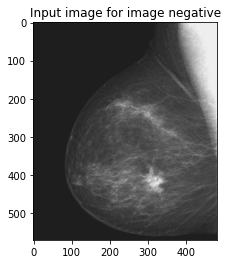

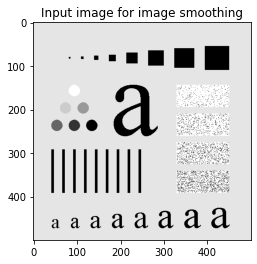

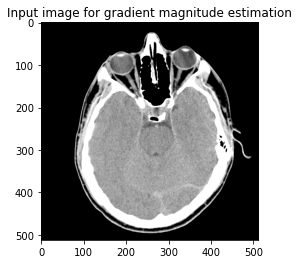

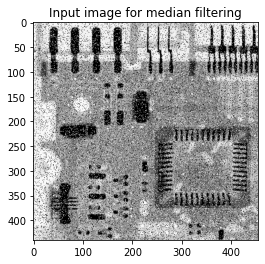

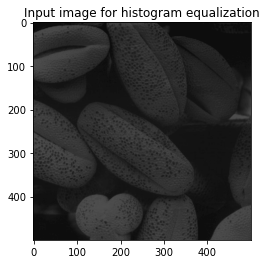

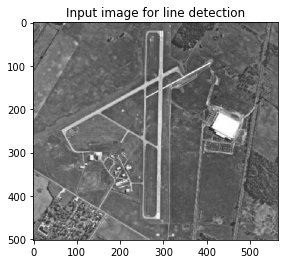

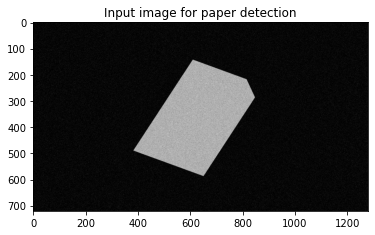

C:\Users\TEJAS KUMAR V URS\AppData\Local\Temp\ipykernel_20304\2990510096.py:122: RuntimeWarning: invalid value encountered in sqrt
  length = np.sqrt((y2 - y1)*2 + (x2 - x1)*2)


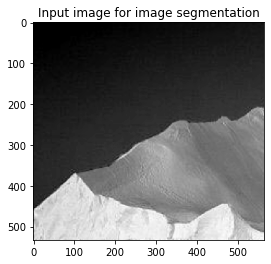

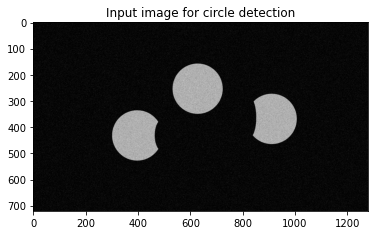

In [13]:
# Run this code block to see your output images
main()